***
# Building prediction model
***

1. **Train data on sales of 2017-2018**
2. **Predict sales 2019-2021 and compare with real values**
3. **Add the subsides and compare the sales**
4. **Evaluate the impact of RV**
<br>

***

In [1]:
# Module that sets paths
import path

path_data =     path.path_data
path_df =       path.path_df
path_output =   path.path_output

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant

c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Data\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Dataframe\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Output\


***
<b>Ce qu'on veut prédire</b> : TYP_CARBU (VÉ)

<b>Variables explicatives</b> : MASSE_NETTE, COUL_ORIG, TYP_DOSS_PERS, PHYS_SEX, PHYS_AGE, REG_ADM, MRC

***
Étapes :
1. feature enginering (encode)
2. train on 2017 and 2018
3. forcast 2019 to 2021
3. compare with real results

In [130]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df_unique = pd.read_hdf(path_df + 'df_unique.h5')
df_unique.head(2)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.0,4.0,2001.0,NaN,ROU,E,P,F,76.0,Centre-du-Québec (17),Drummond (49 ),49030.0,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.0,35999.0,7.8,11.5
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.0,4.0,1509.0,NaN,NOI,W,P,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941),94068.0,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.0,42890.0,5.5,5.6


In [149]:
# Add columns with the prices of EV without subsidie
def subvention(df, col):
    df[f'{col}_nosub'] = np.where((df['TYP_CARBU'] == 'L') & (df['prix_max']< 60000), df[col] + 7000, df[col])
    df[f'{col}_nosub'] = np.where((df['TYP_CARBU'] == 'W') & (df['prix_max'] < 60000), df[col] + 5000, df[f'{col}_nosub'] )

df = df_unique.copy()
subvention(df, 'prix_min')
subvention(df, 'prix_max')

df.head(3)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_min_nosub,prix_max_nosub
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.0,4.0,2001.0,NaN,ROU,E,P,F,76.0,Centre-du-Québec (17),Drummond (49 ),49030.0,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.0,35999.0,7.8,11.5,25099.0,35999.0
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.0,4.0,1509.0,NaN,NOI,W,P,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941),94068.0,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.0,42890.0,5.5,5.6,43790.0,47890.0
2,2017,2017_0000000041,PAU,AU,NISSA,VERSA,2017,1113.0,4.0,1607.0,NaN,GRI,E,P,F,87.0,Laurentides (15),Les Laurentides (78 ),78010.0,https://www.guideautoweb.com/constructeurs/nis...,2017,versa-note,nissan,14498.0,19748.0,6.2,8.6,14498.0,19748.0


In [150]:
col_to_drop = ['CYL_VEH', 'NB_CYL', 'NB_ESIEU_MAX', 'MASSE_NETTE']
df = df.drop(columns=col_to_drop)
df.isna().sum()

AN                        0
NOSEQ_VEH                 0
CLAS                      0
TYP_VEH_CATEG_USA         0
MARQ_VEH                  0
MODEL_VEH                 0
ANNEE_MOD                 0
COUL_ORIG             42630
TYP_CARBU                 0
TYP_DOSS_PERS             0
PHYS_SEX             492920
PHYS_AGE             492920
REG_ADM               22168
MRC                   22168
CG_FIXE               22168
link_model_an        289509
year                 289509
model                289509
brand                289509
prix_min             289519
prix_max             309633
cons_min             368916
cons_max             368916
prix_min_nosub       289519
prix_max_nosub       309633
dtype: int64

In [151]:
df_nona= df.dropna()

print(df_nona.isna().sum())

print(len(df))
print(len(df_nona))

AN                   0
NOSEQ_VEH            0
CLAS                 0
TYP_VEH_CATEG_USA    0
MARQ_VEH             0
MODEL_VEH            0
ANNEE_MOD            0
COUL_ORIG            0
TYP_CARBU            0
TYP_DOSS_PERS        0
PHYS_SEX             0
PHYS_AGE             0
REG_ADM              0
MRC                  0
CG_FIXE              0
link_model_an        0
year                 0
model                0
brand                0
prix_min             0
prix_max             0
cons_min             0
cons_max             0
prix_min_nosub       0
prix_max_nosub       0
dtype: int64
2242375
1481742


In [152]:
df_pre2018 = df_nona.loc[df_nona['AN'] <= 2018]
df_post2018 = df_nona.loc[df_nona['AN'] > 2018]

In [153]:
# Model
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

y = df_pre2018['TYP_CARBU']

# features = ['MASSE_NETTE', 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE' ,'REG_ADM', 'MRC']
X = df_pre2018[['AN' , 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE' ,'REG_ADM', 'MRC', 'prix_min', 'prix_max']]

X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report for more details
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           D       0.20      0.22      0.21       153
           E       0.99      0.99      0.99     62031
           H       0.57      0.51      0.54      1156
           L       0.45      0.47      0.46       169
           N       0.00      0.00      0.00         1
           P       0.00      0.00      0.00         2
           W       0.77      0.76      0.77      1197

    accuracy                           0.97     64709
   macro avg       0.43      0.42      0.42     64709
weighted avg       0.97      0.97      0.97     64709



In [154]:
# Test for overfitting
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.97


In [155]:
# Test for overfitting
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_encoded, y, cv=5)
mean_score = scores.mean()
print(f"Cross-Validation Mean Accuracy: {mean_score:.2f}")

C:\Users\Charles_tour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Mean Accuracy: 0.97


***
## Predictions
***

In [156]:
df_post2018.head()

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_min_nosub,prix_max_nosub
0,2019,2019_0000000055,PAU,AU,BMW,X3,2020,GRI,E,P,M,73.0,Montérégie (16),Vaudreuil-Soulanges (71 ),71133.0,https://www.guideautoweb.com/constructeurs/bmw...,2020,x3,bmw,50250.0,83200.0,8.2,16.6,50250.0,83200.0
1,2019,2019_0000000070,PAU,AU,NISSA,ROGUE,2019,NOI,E,P,M,30.0,Montréal (06),Montréal (66 ),66023.0,https://www.guideautoweb.com/constructeurs/nis...,2019,rogue,nissan,26898.0,37498.0,7.1,9.6,26898.0,37498.0
3,2019,2019_0000000083,PAU,AU,BUICK,ENCOR,2019,NOI,E,P,F,19.0,Saguenay–Lac-Saint-Jean (02),Le Domaine-du-Roy (91 ),91025.0,https://www.guideautoweb.com/constructeurs/bui...,2019,encore,buick,26400.0,33700.0,7.8,9.9,26400.0,33700.0
4,2019,2019_0000000088,PAU,AU,HYUND,KONA,2020,GRI,E,P,F,54.0,Estrie (05),Memphrémagog (45 ),45093.0,https://www.guideautoweb.com/constructeurs/hyu...,2020,kona,hyundai,21199.0,52999.0,9.2,100.0,21199.0,52999.0
5,2019,2019_0000000099,PAU,AU,MAZDA,CX-9,2019,NOI,E,P,M,54.0,Lanaudière (14),L'Assomption (60 ),60013.0,https://www.guideautoweb.com/constructeurs/maz...,2019,cx-9,mazda,36700.0,51500.0,8.4,11.6,36700.0,51500.0


In [157]:
# predict after 2018, original data
X_sub = df_post2018[['AN', 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE', 'REG_ADM', 'MRC', 'prix_min', 'prix_max']]
X_new_encoded = pd.get_dummies(X_sub)

y_pred_sub = model.predict(X_new_encoded)

In [158]:
# predict after 2018, stop subvention
X_nosub = df_post2018[['AN', 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE', 'REG_ADM', 'MRC', 'prix_min_nosub', 'prix_max_nosub']]
X_nosub = X_nosub.rename(columns={'prix_min_nosub' : 'prix_min', 'prix_max_nosub' : 'prix_max'})
X_new_encoded = pd.get_dummies(X_nosub)

y_pred_nosub = model.predict(X_new_encoded)

In [159]:
new_df = X_sub.copy()

new_df['TYP_CARBU_real'] = df_post2018['TYP_CARBU']
new_df['TYP_CARBU_predict_sub'] = y_pred_sub
new_df['TYP_CARBU_predict_nosub'] = y_pred_nosub
new_df

,AN,COUL_ORIG,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,prix_min,prix_max,TYP_CARBU_real,TYP_CARBU_predict_sub,TYP_CARBU_predict_nosub
0,2019,GRI,M,73.0,Montérégie (16),Vaudreuil-Soulanges (71 ),50250.0,83200.0,E,E,E
1,2019,NOI,M,30.0,Montréal (06),Montréal (66 ),26898.0,37498.0,E,E,E
3,2019,NOI,F,19.0,Saguenay–Lac-Saint-Jean (02),Le Domaine-du-Roy (91 ),26400.0,33700.0,E,E,E
4,2019,GRI,F,54.0,Estrie (05),Memphrémagog (45 ),21199.0,52999.0,E,E,E
5,2019,NOI,M,54.0,Lanaudière (14),L'Assomption (60 ),36700.0,51500.0,E,E,E
...,...,...,...,...,...,...,...,...,...,...,...
421279,2021,BLE,F,76.0,Laurentides (15),Mirabel (74 ),17599.0,24999.0,E,E,E
421281,2021,GRI,M,65.0,Montréal (06),Montréal (66 ),30995.0,43995.0,E,E,E
421282,2021,NOI,F,48.0,Saguenay–Lac-Saint-Jean (02),Lac-Saint-Jean-Est (93 ),21299.0,53149.0,L,E,E
421283,2021,GRI,F,61.0,Laurentides (15),Argenteuil (76 ),29970.0,43570.0,E,E,E


In [161]:
# Sum by type of fuel
real_count = new_df.groupby(['AN', 'TYP_CARBU_real']).size().reset_index(name='obs').rename(columns={'TYP_CARBU_real':'TYP_CARBU', 'obs':'TYP_CARBU_real'})
predsub_count = new_df.groupby(['AN', 'TYP_CARBU_predict_sub']).size().reset_index(name='obs').rename(columns={'TYP_CARBU_predict_sub':'TYP_CARBU', 'obs':'TYP_CARBU_predict_sub'})
prednosub_count = new_df.groupby(['AN', 'TYP_CARBU_predict_nosub']).size().reset_index(name='obs').rename(columns={'TYP_CARBU_predict_nosub':'TYP_CARBU', 'obs':'TYP_CARBU_predict_nosub'})

result = pd.merge(real_count, predsub_count)
result = pd.merge(result, prednosub_count)

result.to_excel(path_output + 'result.xlsx')
result

,AN,TYP_CARBU,TYP_CARBU_real,TYP_CARBU_predict_sub,TYP_CARBU_predict_nosub
0,2019,A,1,1,1
1,2019,D,240,866,1236
2,2019,E,274965,280383,286240
3,2019,H,6704,5073,4452
4,2019,L,4381,2906,1256
5,2019,N,3,16,4
6,2019,P,16,1,2
7,2019,W,9024,6085,2140
8,2020,A,2,2,3
9,2020,D,123,1841,2125


***
## Results
1. Accuracy: 0.94: The overall accuracy of your model is 94%, indicating that it correctly predicts the class labels for approximately 94% of the total instances.
2. Precision : the ratio of true positive predictions to the total positive predictions made by the model. Precision = True Positives / (True Positives + False Positives)
3. Recall (Sensitivity or True Positive Rate) : Recall is the ratio of true positive predictions to the total actual positives in the dataset.
4. F1-Score: F1-Score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, providing a single metric that combines both aspects.
F1-Score is calculated as: F1-Score = 2 * (Precision * Recall) / (Precision + Recall).

<u>**Type de carburant**</u> <br>
A = Autre <br>
C = Hydrogène <br>
D = Diésel <br>
E = Essence <br>
H = Hybride <br>
L = Électricité <br>
M = Méthanol <br>
N = Gaz naturel <br>
P = Propane <br>
S = Non-propulsé <br>
T = Éthanol <br>
W = Hybride branchable <br>
blanc = Non précisé <br>

IndexError: index 7 is out of bounds for axis 1 with size 7

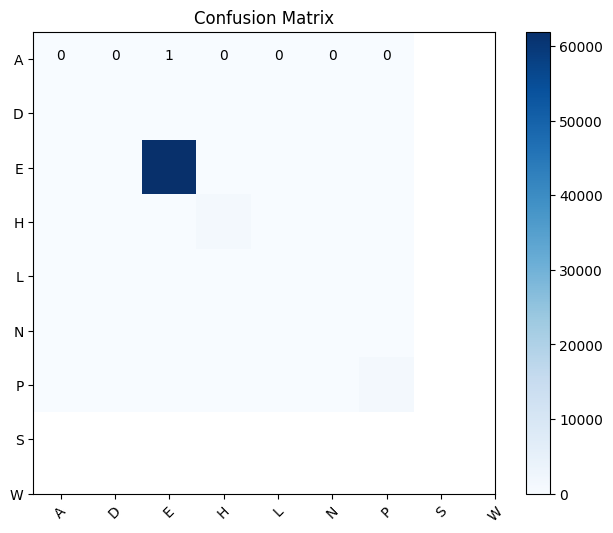

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Create a confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = model.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [20]:
# Number of top features to display
top_n = 10  # Change this value to the number of top features you want to display

# Sort feature importances and select the top N
sorted_feature_importance = sorted(zip(feature_importance, feature_names), reverse=True)
top_feature_importance = sorted_feature_importance[:top_n]
top_feature_names, top_feature_importance = zip(*top_feature_importance)

# Create a bar chart to visualize the top features
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(range(len(top_feature_importance)), top_feature_importance)
plt.yticks(range(len(top_feature_importance)), top_feature_names)
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Feature Importance of the Decision Tree')
plt.show()


NameError: name 'feature_importance' is not defined